**Tensorflow Version 2.4.1**

In [ ]:
# CS3244 Project (Oliver Version)
# Tensorflow Version: 2.4.1

In [ ]:
# !pip install opencv-python==4.2.0.34 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from keras.layers import LeakyReLU
import cv2
data_path = "/content/gdrive/MyDrive/Colab Notebooks/fer2013.csv"

df = pd.read_csv(data_path)

In [ ]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
train = df[df.Usage == "Training"]
len(train)

28709

In [ ]:
validation = df[(df.Usage == "PrivateTest") | (df.Usage == "PublicTest")]
len(validation)

7178

### A sample face

In [ ]:
def convert(x):
    img = np.fromstring(x, dtype = int, sep = ' ')
    img = img.reshape(48,48,1)
    img = img.astype('float32')
    return img
    
x_train = train.pixels.apply(convert)
x_train = np.stack(x_train, axis = 0)
x_train.shape

x_validation = validation.pixels.apply(convert)
x_validation = np.stack(x_validation, axis = 0)

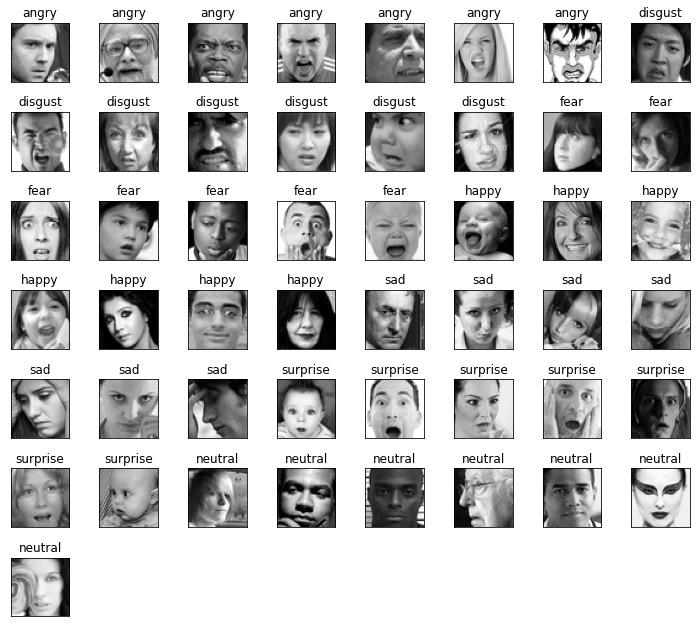

In [ ]:
from matplotlib import pyplot
fig = pyplot.figure(1, (10, 10))
emotion_dict = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion == label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(8, 8, k)
        ax.imshow(px, cmap='gray')
        ax.set_title(emotion_dict[label])
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.tight_layout()

### Building CNN

In [ ]:
# import os
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_VISIBLE_DEVICES'] = "" #please put your GPU

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(train.emotion, 7) 
y_validation = np_utils.to_categorical(validation.emotion, 7) 

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True)

In [ ]:
train_generator = datagen.flow(x_train, y_train, batch_size=64) # number of images in each batch
validation_generator = datagen.flow(x_validation, y_validation, batch_size=64)

In [ ]:
# Write your code here
# lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(48,48,1),padding='same', kernel_initializer='he_normal', name="conv2d_1"))
model.add(BatchNormalization(name="batch_norm_1"))
model.add(Conv2D(64, kernel_size=(5, 5), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(48,48,1),padding='same', kernel_initializer='he_normal', name="conv2d_2"))
model.add(BatchNormalization(name="batch_norm_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="max_pool_1"))
model.add(Dropout(0.4, name='dropout_1'))
model.add(Conv2D(128, kernel_size=(3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(48,48,1),padding='same', kernel_initializer='he_normal', name='conv2d_3'))
model.add(BatchNormalization(name='batchnorm_3'))
model.add(Conv2D(128, kernel_size=(3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(48,48,1),padding='same', kernel_initializer='he_normal', name='conv2d_4'))
model.add(BatchNormalization(name='batchnorm_4'))
model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2d_2'))
model.add(Dropout(0.4, name='dropout_2'))
model.add(Conv2D(256, kernel_size=(3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(48,48,1),padding='same', kernel_initializer='he_normal', name='conv2d_5'))
model.add(BatchNormalization(name='batchnorm_5'))
model.add(Conv2D(256, kernel_size=(3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(48,48,1),padding='same', kernel_initializer='he_normal', name='conv2d_6'))
model.add(BatchNormalization(name='batchnorm_6'))
model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2d_3'))
model.add(Dropout(0.5, name='dropout_3'))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1), name='dense_1'))
model.add(BatchNormalization(name='batchnorm_7'))
model.add(Dropout(0.6, name='dropout_4'))
model.add(Dense(7, activation='softmax', name='out_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 48, 48, 64)        256       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [ ]:
# Define your optimizer here
optim = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon=1e-07, name = "Nadam")

model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

In [ ]:
len(validation_generator)
len(train_generator)

449

In [ ]:
# save the model

early_stopping = EarlyStopping(
    monitor='val_acc',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_acc',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,)

epochs = 100

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='CS3244_Oliver.h5', mode='max', monitor='val_acc', verbose=2, save_best_only=True)
callbacks_list = [checkpoint]


model.fit(
      train_generator,
      steps_per_epoch=train_generator.n/train_generator.batch_size ,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.n/validation_generator.batch_size,
      verbose=1,
      callbacks=[early_stopping, lr_scheduler, checkpoint])

Epoch 1/100
448/448 [==============================] - 57s 50ms/step - loss: 2.5656 - acc: 0.1897 - val_loss: 1.7537 - val_acc: 0.2873

Epoch 00001: val_acc improved from -inf to 0.28727, saving model to CS3244_Oliver.h5
Epoch 2/100
448/448 [==============================] - 21s 47ms/step - loss: 1.8628 - acc: 0.2662 - val_loss: 1.6739 - val_acc: 0.3298

Epoch 00002: val_acc improved from 0.28727 to 0.32976, saving model to CS3244_Oliver.h5
Epoch 3/100
448/448 [==============================] - 21s 48ms/step - loss: 1.6844 - acc: 0.3379 - val_loss: 1.5824 - val_acc: 0.3813

Epoch 00003: val_acc improved from 0.32976 to 0.38130, saving model to CS3244_Oliver.h5
Epoch 4/100
448/448 [==============================] - 21s 48ms/step - loss: 1.5591 - acc: 0.3944 - val_loss: 1.4540 - val_acc: 0.4419

Epoch 00004: val_acc improved from 0.38130 to 0.44191, saving model to CS3244_Oliver.h5
Epoch 5/100
448/448 [==============================] - 22s 48ms/step - loss: 1.4442 - acc: 0.4412 - val_los

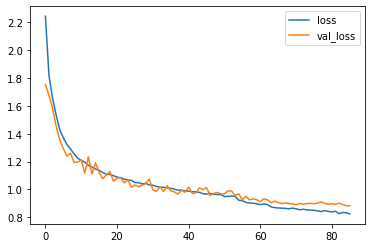

In [ ]:
# Plotting the model (loss)
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

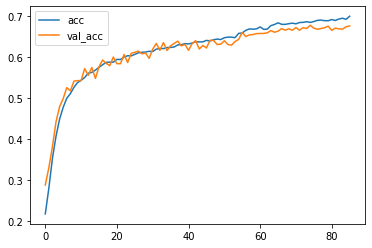

In [ ]:
# Plotting the model (accuracy)
metrics[['acc', 'val_acc']].plot()

In [ ]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [ ]:
y_pred_ = model.predict(x_validation/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_validation, axis=1)

225/225 [==============================] - 2s 7ms/step


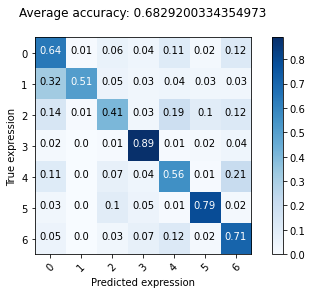

In [ ]:
import itertools
classes=np.array(("0", "1", "2", "3", "4", "5", "6"))
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

### Saving the model

In [ ]:
# save your model and weight (only submit best model)
model_json = model.to_json()
with open("CS3244_Oliver.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('CS3244_Oliver.h5')

### Testing

In [ ]:
# Model reconstruction from JSON file
with open('CS3244_Oliver.json', 'r') as json_file:
    json_savedModel= json_file.read()

test_model = tf.keras.models.model_from_json(json_savedModel, custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU(alpha=0.1)})
test_model.summary()

test_model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

# Load weights into the new model
test_model.load_weights('CS3244_Oliver.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 48, 48, 64)        256       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)      

In [ ]:
## Testing
test_loss, test_acc = model.evaluate(faces/255.0, emotions) 
print('Test accuracy:', test_acc)

742/742 [==============================] - 4s 5ms/step - loss: 0.5267 - acc: 0.8017
Test accuracy: 0.8017183542251587
